In [1]:
import os

from GENE_sim_tools.GENE_sim_reader.src.dict_simulation_data import sim_filepath_to_df
from GENE_sim_tools.GENE_sim_reader.src.sim_bundler.sim_df_bundler_scripts import sort_by_column_name, simulation_df_bundler

In [2]:
base_path_132588_q_4 = '/pscratch/sd/j/joeschm/NSXTU_discharges/132588/r_0.736_q=4_MTM_mode'

# Base kymin scans path
kymin_path = os.path.join(base_path_132588_q_4, 'kymin_scan')

# theta_0 (kx_center) scans
kx_center_path = os.path.join(base_path_132588_q_4, 'kx_center_scan')
# B_parallel false paths
bpar_F_path = os.path.join(base_path_132588_q_4, 'bpar_check')


# Convergence checks
nz0_0 = os.path.join(base_path_132588_q_4, 'convergence_check/kymin_scan_nz0_256')
nz0_1 = os.path.join(base_path_132588_q_4, 'convergence_check/kymin_scan_nz0_64')

nx0_0 = os.path.join(base_path_132588_q_4, 'convergence_check/kymin_scan_nx0_14')
nx0_1 = os.path.join(base_path_132588_q_4, 'convergence_check/kymin_scan_nx0_20')
nx0_paths = [nx0_0, kymin_path]

nv0_0 = os.path.join(base_path_132588_q_4, 'convergence_check/kymin_scan_nv0_72')
nv0_paths = [nv0_0, kymin_path]

nw0_0 = os.path.join(base_path_132588_q_4, 'convergence_check/kymin_scan_nw0_16')
nw0_paths = [nw0_0, kymin_path]

In [13]:
criteria = ['kymin==0.2', 'gamma', 'omega']

nz0_0_df = sim_filepath_to_df(nz0_0, criteria_list=criteria)
kymin_path_df = sim_filepath_to_df(kymin_path, criteria_list=criteria)


input_sims = [nz0_0_df]
# input_sims = [kymin_path, nz0_0, nz0_1, nx0_0_df, nv0_0]


# bundled_sims, group_by, _ = simulation_df_bundler(input_sim_df_list=input_sims, input_group_by=['nz0', 'hyp_z'])


bundled_sims, group_by, _ = simulation_df_bundler(input_sim_df_list=input_sims, input_group_by=['kymin'], input_bundle_outputs=['hyp_z', 'gamma'])

bundled_sims


,kymin,hyp_z,gamma
0,0.2,"[1.0, 2.0, -1.0, -2.0, 8.0, -8.0, -2.0]","[0.125, 0.08, 0.027, -0.006, 0.033, -0.006, -0..."


In [15]:
df1 = sort_by_column_name(bundled_sims, column_name='hyp_z')

df1

,kymin,hyp_z,gamma
0,0.2,"[-8.0, -2.0, -2.0, -1.0, 1.0, 2.0, 8.0]","[-0.006, -0.006, -0.006, 0.027, 0.125, 0.08, 0..."


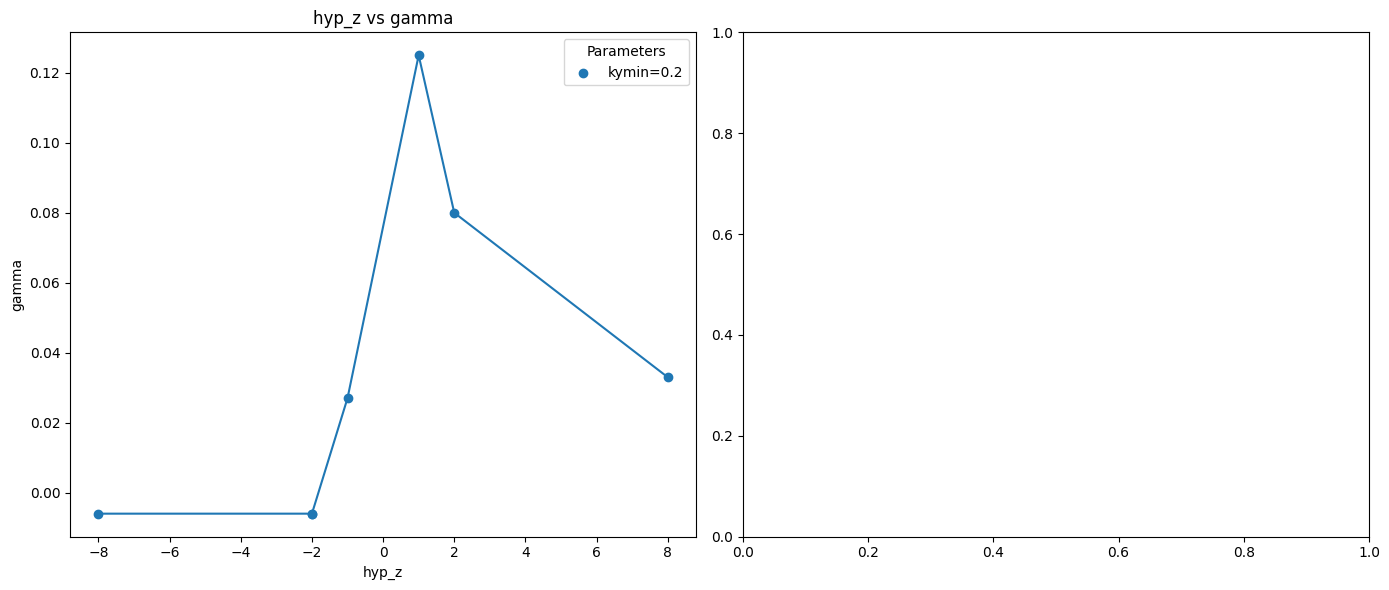

In [17]:
import matplotlib.pyplot as plt
import pandas as pd


# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))


for i, row in df1.iterrows():

    # label = f'nz0={row["nz0"]}, nx0={row["nx0"]}'
    f_string_parts = [f'{var_name}={{row[{var_name}]}}' for var_name in group_by]
    f_string_format = ", ".join(f_string_parts)
    label = f_string_format.format(row=row)


    # Scatter plot for kymin vs gamma
    axs[0].scatter(row['hyp_z'], row['gamma'], label=label)
    axs[0].plot(row['hyp_z'], row['gamma'], linestyle='-', marker=None)  # Add lines
    axs[0].set_title('hyp_z vs gamma')
    axs[0].set_xlabel('hyp_z')
    axs[0].set_ylabel('gamma')
    # axs[0].set_xscale('log')
    

    # # Scatter plot for kymin vs omega
    # axs[1].scatter(row['kymin'], row['omega'], label=label)
    # axs[1].set_title('kymin vs omega')
    # axs[1].set_xlabel('kymin')
    # axs[1].set_ylabel('omega')
    # axs[1].set_xscale('log')

# Adding legends
axs[0].legend(loc='upper right', title='Parameters')
# axs[1].legend(loc='upper right', title='Parameters')

# Show plot
plt.tight_layout()
plt.show()



In [8]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_kymin_vs_gamma_omega_scatter(df, group_by):

    

    # Creating subplots
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))


    for i, row in df.iterrows():

        # label = f'nz0={row["nz0"]}, nx0={row["nx0"]}'
        f_string_parts = [f'{var_name}={{row[{var_name}]}}' for var_name in group_by]
        f_string_format = ", ".join(f_string_parts)
        label = f_string_format.format(row=row)


        # Scatter plot for kymin vs gamma
        axs[0].scatter(row['kymin'], row['gamma'], label=label)
        axs[0].plot(row['kymin'], row['gamma'], linestyle='-', marker=None)  # Add lines
        axs[0].set_title('kymin vs gamma')
        axs[0].set_xlabel('kymin')
        axs[0].set_ylabel('gamma')
        axs[0].set_xscale('log')
        

        # Scatter plot for kymin vs omega
        axs[1].scatter(row['kymin'], row['omega'], label=label)
        axs[1].set_title('kymin vs omega')
        axs[1].set_xlabel('kymin')
        axs[1].set_ylabel('omega')
        axs[1].set_xscale('log')

    # Adding legends
    axs[0].legend(loc='upper right', title='Parameters')
    axs[1].legend(loc='upper right', title='Parameters')

    # Show plot
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming df is your DataFrame
# plot_kymin_vs_gamma_omega_scatter(df)


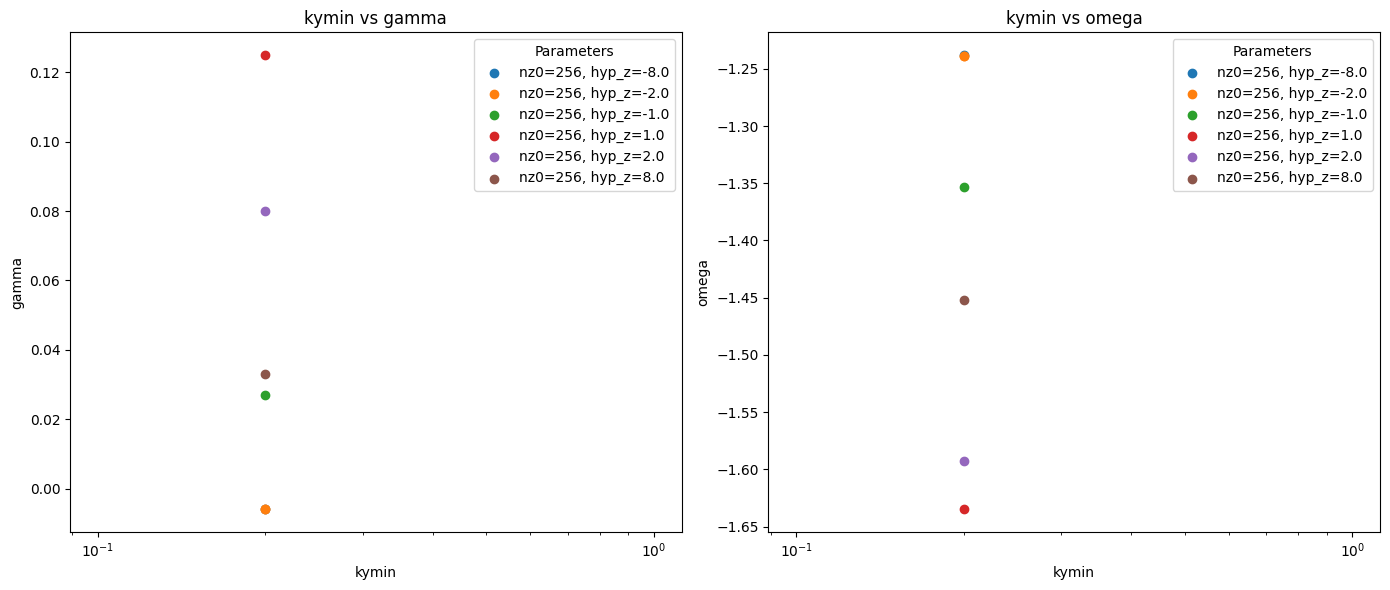

In [9]:
# plot_kymin_vs_gamma_omega_scatter(bundled_sims, group_by)

plot_kymin_vs_gamma_omega_scatter(df1, group_by)

